In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your dataset
df_details = pd.read_json("/content/drive/MyDrive/netflix_Model/IMDB_movie_details.json", lines=True)
df_reviews = pd.read_json("/content/drive/MyDrive/netflix_Model/IMDB_reviews.json", lines=True)



In [15]:
df_details.head()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis,Month,Year
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",-0.177562,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in...",6,1992
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],-0.487589,2013-11-01,Four boys around the age of 10 are friends in ...,11,2013
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",-0.384247,2002-04-11,,4,2002
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",1.269230,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...,1,1948
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",0.235807,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...,5,1999


In [16]:
# Convert Release_Date to datetime and extract month and year
df_details['release_date'] = pd.to_datetime(df_details['release_date'])
df_details['Month'] = df_details['release_date'].dt.month
df_details['Year'] = df_details['release_date'].dt.year

# Optional: Normalize ratings if needed
scaler = StandardScaler()
df_details['rating'] = scaler.fit_transform(df_details['rating'].values.reshape(-1, 1))


In [17]:
# Split the data into training and testing sets
X = df_details[['Month', 'Year']]
y = df_details['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

In [19]:

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 0.95
R-squared: 0.03


In [20]:
X_test.head()

,Month,Year
1120,3,2001
810,12,2017
1170,12,2003
534,11,2006
514,9,1992


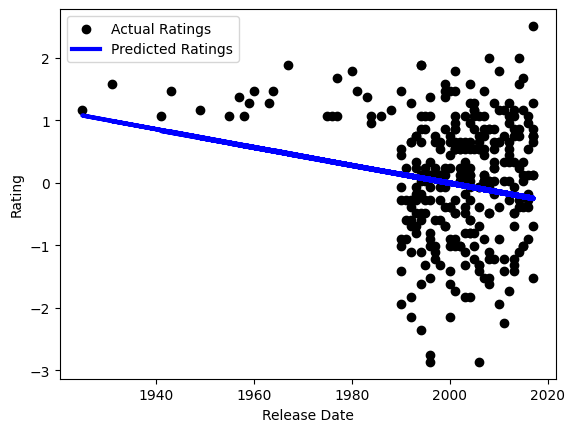

In [21]:
# Visualize the predictions
plt.scatter(X_test['Year'], y_test, color='black', label='Actual Ratings')
plt.plot(X_test['Year'], predictions, color='blue', linewidth=3, label='Predicted Ratings')
plt.xlabel('Release Date')
plt.ylabel('Rating')
plt.legend()
plt.show()